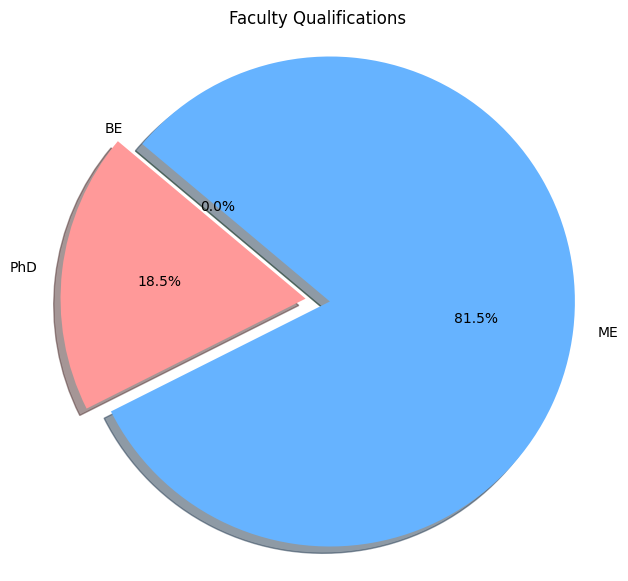

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install PyMuPDF reportlab PyPDF2  # Install the missing library
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader
import io
from collections import Counter
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from PyPDF2 import PdfReader # Now this import will work
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.pdfgen import canvas

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):

    pdf_path = '/content/Faculty-IT Dept.pdf'
    reader = PdfReader(pdf_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return text

# Function to categorize qualifications
def categorize_qualifications(text):
    categories = {
        "PhD": 0,
        "ME": 0,
        "BE": 0
    }

    # Define patterns
    phd_pattern = r'Ph\.D\.'
    me_pattern = r'M\.E\.|M\.Tech\.'
    be_pattern = r'B\.E\.'

    # Find all matches
    phd_matches = re.findall(phd_pattern, text)
    me_matches = re.findall(me_pattern, text)
    be_matches = re.findall(be_pattern, text)

    # Update counts
    categories["PhD"] += len(phd_matches)
    categories["ME"] += len(me_matches)
    categories["BE"] += len(be_matches)

    return categories

# Function to create pie chart
def create_pie_chart(categories):
    labels = categories.keys()
    sizes = categories.values()
    colors = ['#ff9999','#66b3ff','#99ff99']
    explode = (0.1, 0, 0)  # explode 1st slice

    plt.figure(figsize=(7, 7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Faculty Qualifications')
    plt.show()

# Function to generate PDF report
def generate_pdf_report(categories, output_path):
    c = canvas.Canvas(output_path, pagesize=letter)
    width, height = letter

    # Title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, height - 50, "Faculty Report")

    # Summary
    c.setFont("Helvetica", 12)
    c.drawString(100, height - 100, "Summary of Faculty Qualifications:")
    c.drawString(100, height - 120, f"Total PhD: {categories['PhD']}")
    c.drawString(100, height - 140, f"Total ME: {categories['ME']}")
    c.drawString(100, height - 160, f"Total BE: {categories['BE']}")

    # Pie Chart
    create_pie_chart(categories)

    c.showPage()
    c.save()

# Path to PDF
pdf_path = '/content/Faculty-IT Dept.pdf'
text = extract_text_from_pdf(pdf_path)

# Categorize qualifications
categories = categorize_qualifications(text)

# Create pie chart and generate report
generate_pdf_report(categories, '/content/faculty_report.pdf')

# Download the report
from google.colab import files
files.download('/content/faculty_report.pdf')
